In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
import warnings
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#import Dataset
df=pd.read_csv("/content/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [ ]:
df=df.round(decimals=2,out=None)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
1,2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2,2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
3,2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
4,2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.53,284.25,280.37,284.00,282.05,24643000
2007,2019-12-24,284.69,284.89,282.92,284.27,282.32,12119700
2008,2019-12-26,284.82,289.98,284.70,289.91,287.92,23280300
2009,2019-12-27,291.12,293.97,288.12,289.80,287.81,36566500
2010,2019-12-30,289.46,292.69,285.22,291.52,289.52,36028600


In [ ]:
df.shape

(2011, 7)

In [ ]:
df.index

RangeIndex(start=0, stop=2011, step=1)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


# Visualization

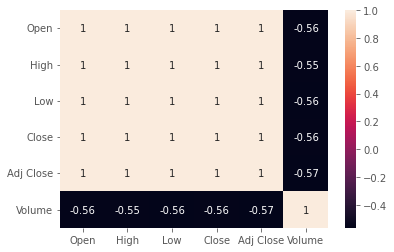

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

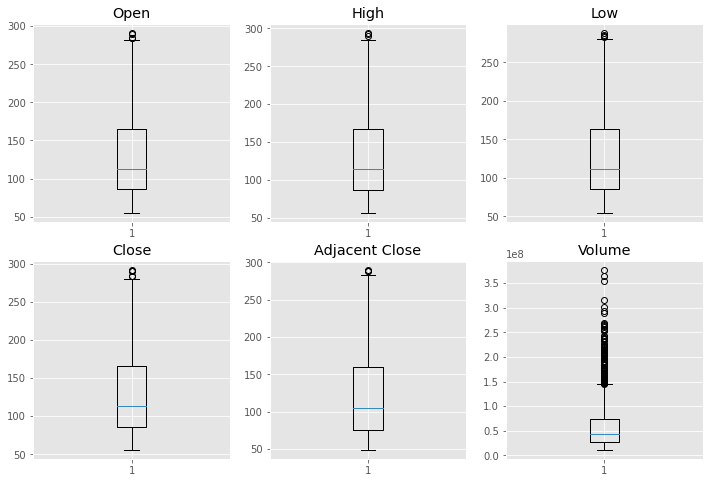

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(12,8))
ax[0,0].boxplot(df.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(df.High);ax[0,1].set_title("High")
ax[0,2].boxplot(df.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(df.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(df['Adj Close']);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(df.Volume);ax[1,2].set_title("Volume")
plt.show()

In [ ]:
df.set_index('Date',inplace=True)
df['year']=df.index.year
df['month']=df.index.strftime('%B')
df['day']=df.index.strftime('%A')
df['quarter']=df.index.quarter

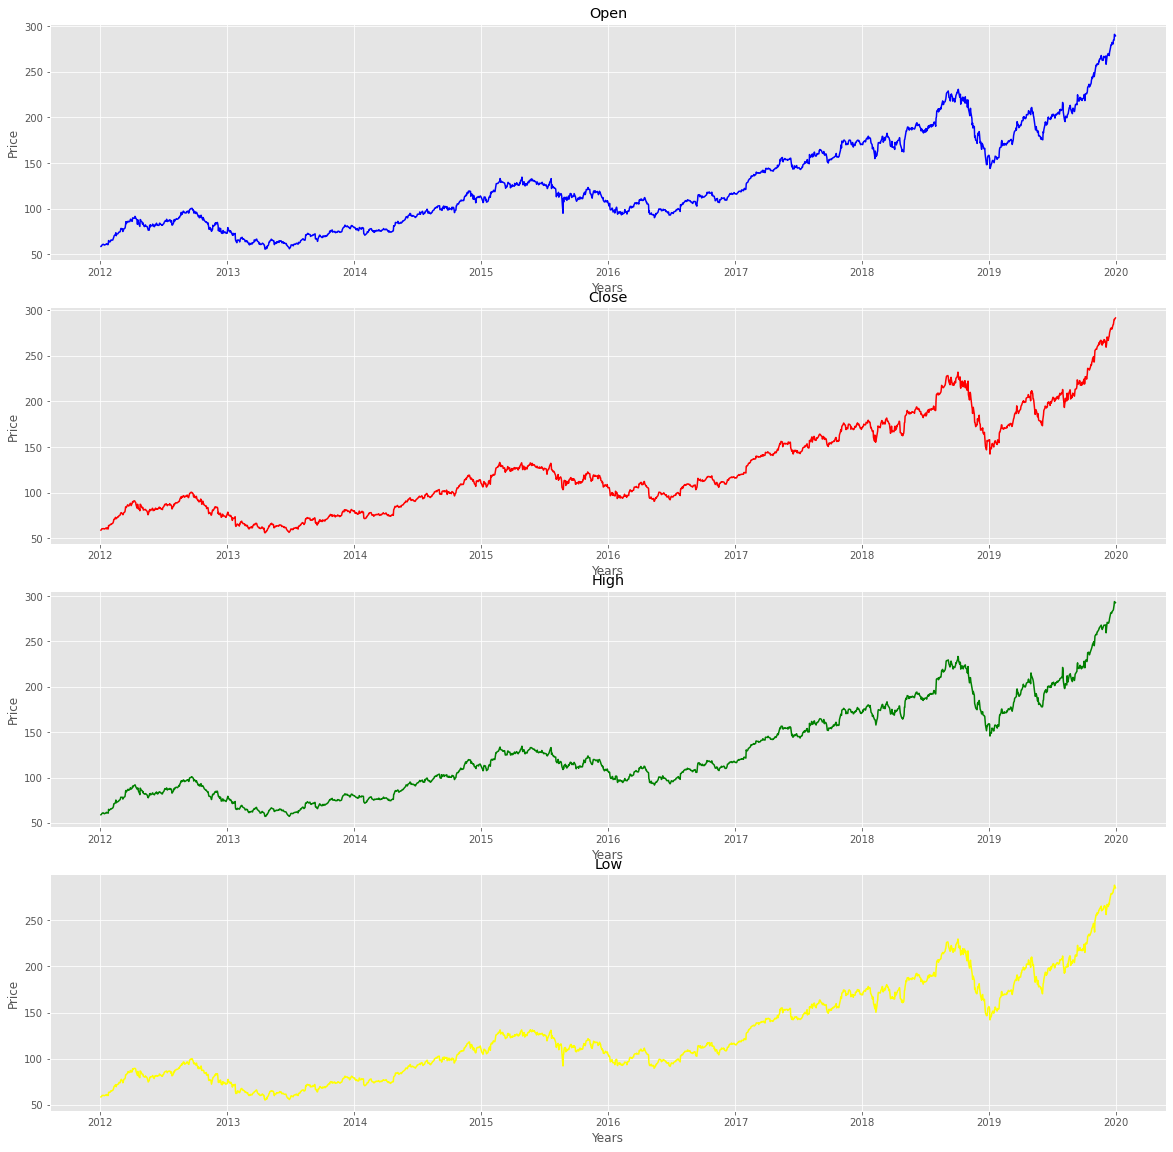

In [ ]:

plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(df.index,df['Open'],color='blue');plt.title("Open");plt.xlabel("Years");plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(df.index,df['Close'],color='red');plt.title("Close");plt.xlabel("Years");plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(df.index,df['High'],color='green');plt.title("High");plt.xlabel("Years");plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(df.index,df['Low'],color='yellow');plt.title("Low");plt.xlabel("Years");plt.ylabel('Price')
plt.show()


In [ ]:
close_year=df.groupby('year')[['Close']].sum()
close_year.head()


,Close
year,
2012,20573.26
2013,17014.84
2014,23250.73
2015,30250.08
2016,26360.21


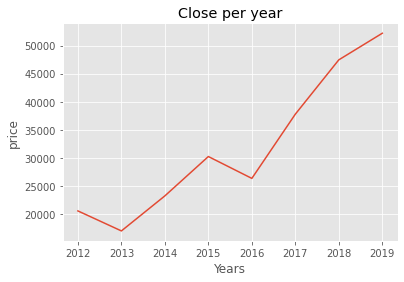

In [ ]:
plt.plot(close_year);plt.xlabel("Years");plt.ylabel('price');plt.title("Close per year")
plt.show()

In [ ]:
close_month=df.groupby('month')[['Close']].sum()
close_month.head()


,Close
month,
April,20080.78
August,23633.79
December,22603.49
February,17377.55
January,17696.30


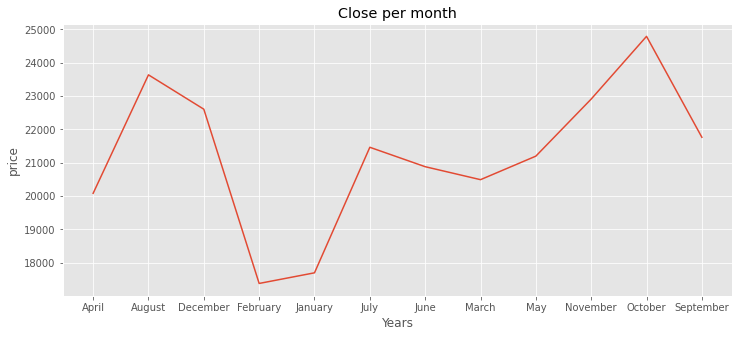

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(close_month);plt.xlabel("Years");plt.ylabel('price');plt.title("Close per month")
plt.show()

In [ ]:
close_day=df.groupby('day')[['Close']].sum()
close_day.head()


,Close
day,
Friday,51380.35
Monday,48300.65
Thursday,51212.33
Tuesday,52038.07
Wednesday,51945.30


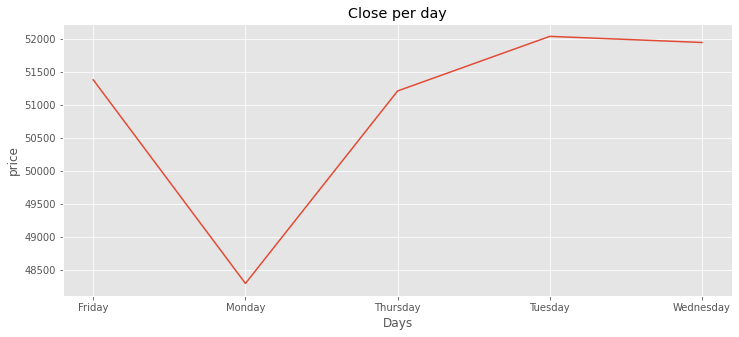

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(close_day);plt.xlabel("Days");plt.ylabel('price');plt.title("Close per day")
plt.show()

monthly close stock price data distribution

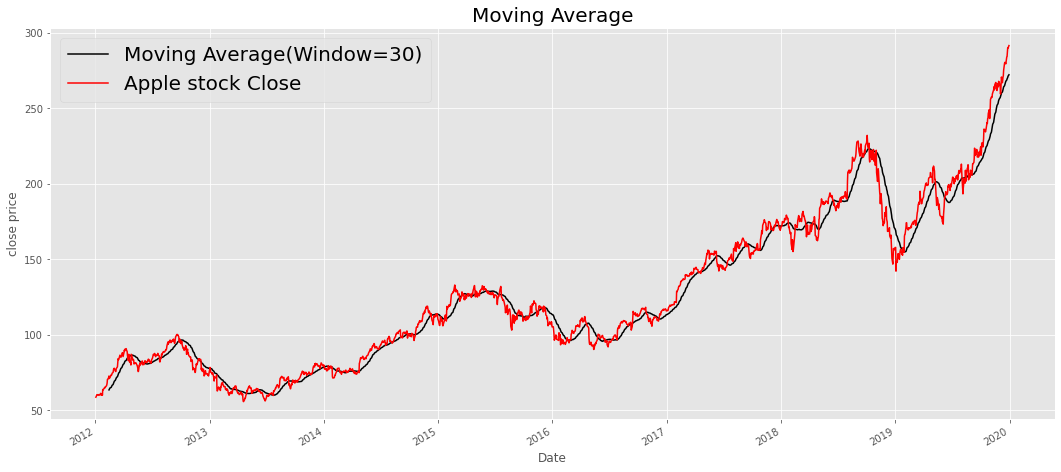

In [ ]:
plt.figure(figsize=(18,8))
df['Close'].rolling(window=30).mean().plot(label='Moving Average(Window=30)',color='black')
df['Close'].plot(label='Apple stock Close',color='red')
plt.title("Moving Average",fontsize=20);plt.ylabel('close price')
plt.legend(loc='upper left',fontsize=20)
plt.show()

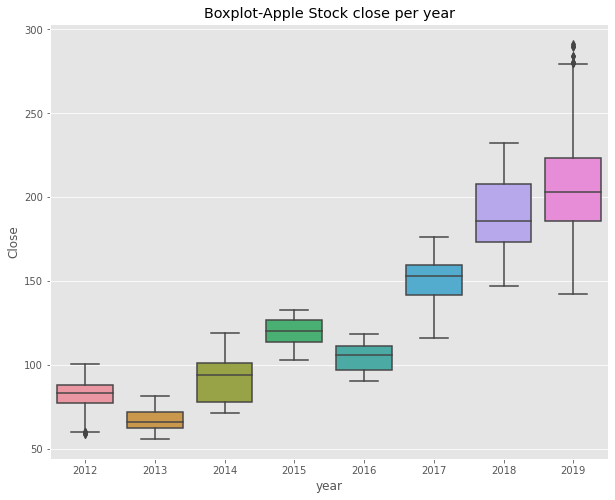

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['year'],y=df['Close'])
plt.title('Boxplot-Apple Stock close per year')
plt.style.context('fivethirtyeight')
plt.show()


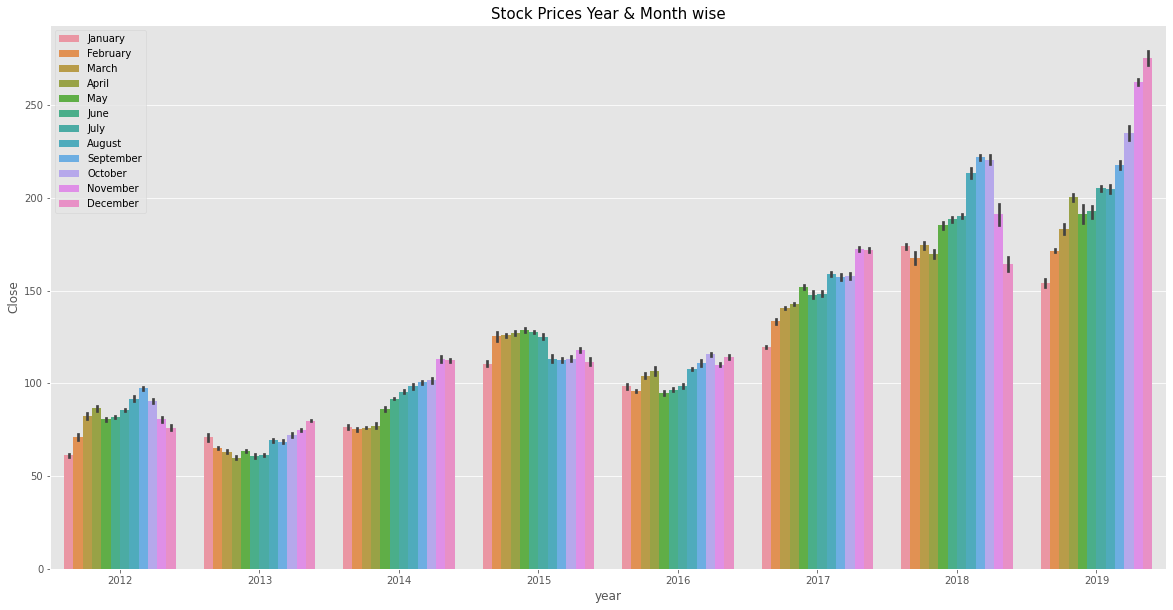

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
palette=sns.color_palette("Paired",4)
a =sns.barplot(x=df['year'],y=df["Close"],hue=df['month'],data=df['month'])
a.set_title("Stock Prices Year & Month wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Resampling
monthly_mean=df['Close'].resample('M').mean()
monthly_df=monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


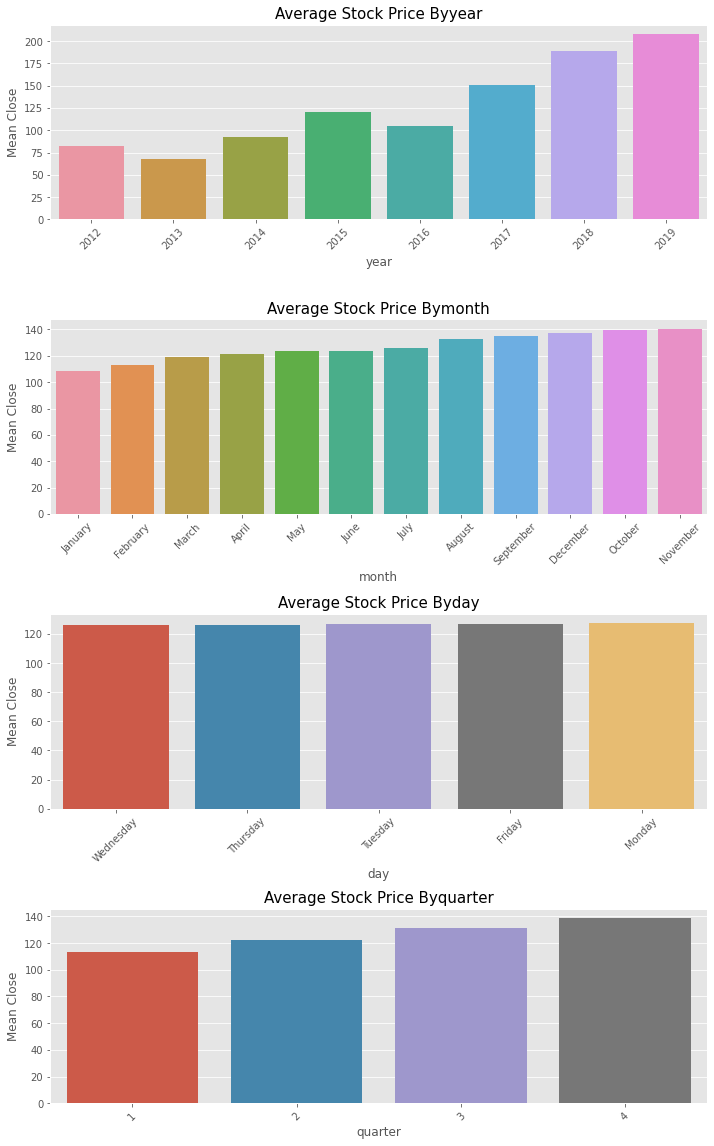

In [ ]:
fig=plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
group_cols=group_cols.columns

for enum,i in enumerate(group_cols[1:]):
    ax=fig.add_subplot(4,1,enum+1)
    Aggregated=pd.DataFrame(df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i),ylabel='Mean Close')
    ax.set_title("Average Stock Price By{}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=1)

In [ ]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 1440x1152 with 0 Axes>

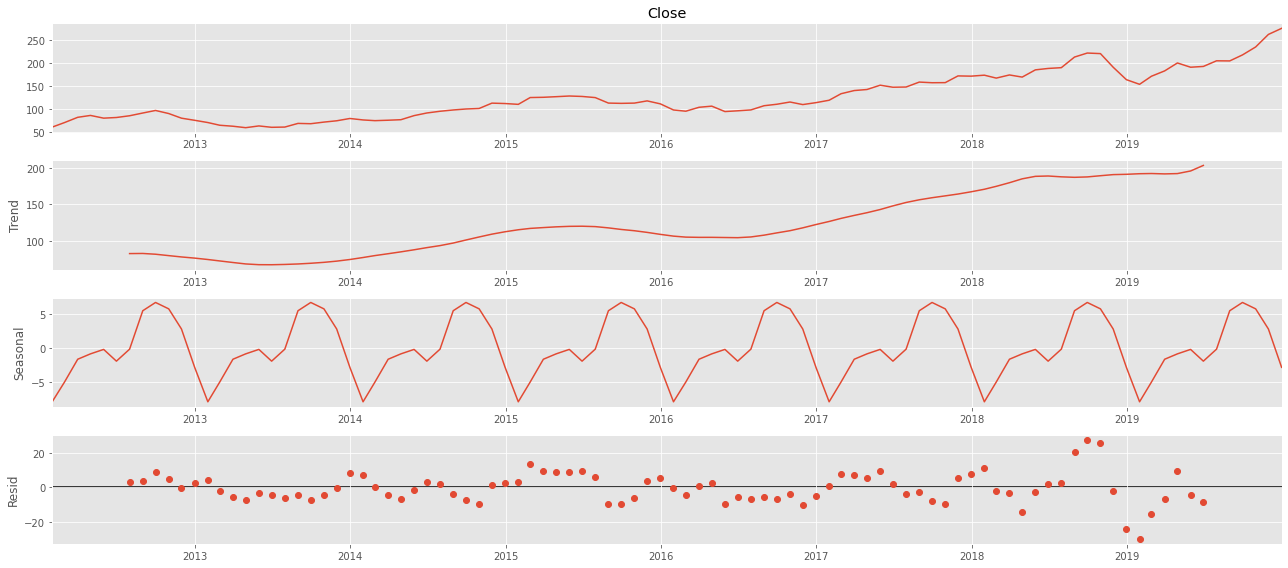

In [ ]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series=sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

we can quite clearly see that the data has all 3 levels trends seasonalitiy

#Plotting Rolling Statistics

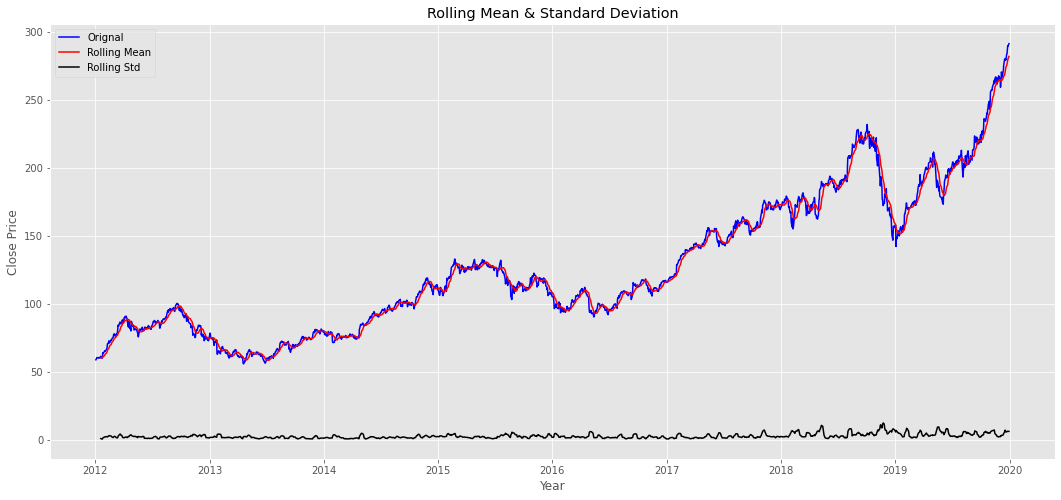

In [ ]:
rolmean=df['Close'].rolling(12).mean()
rolstd=df['Close'].rolling(12).std()
orig=plt.plot(df['Close'],color='blue',label='Orignal')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.xlabel("Year")
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# ADF(Augumented Dickey-Fuller) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistics', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is stationary")
    else:
        print("Accept Null Hypothesis. Data is non-stationary")
   

In [ ]:
adfuller_test(df['Close'])

ADF Test Statistics: 1.2193479467002408
p-value: 0.9961168706935021
# Lags Used: 9
Number of Observations Used: 2001
Accept Null Hypothesis. Data is non-stationary


# Detrend

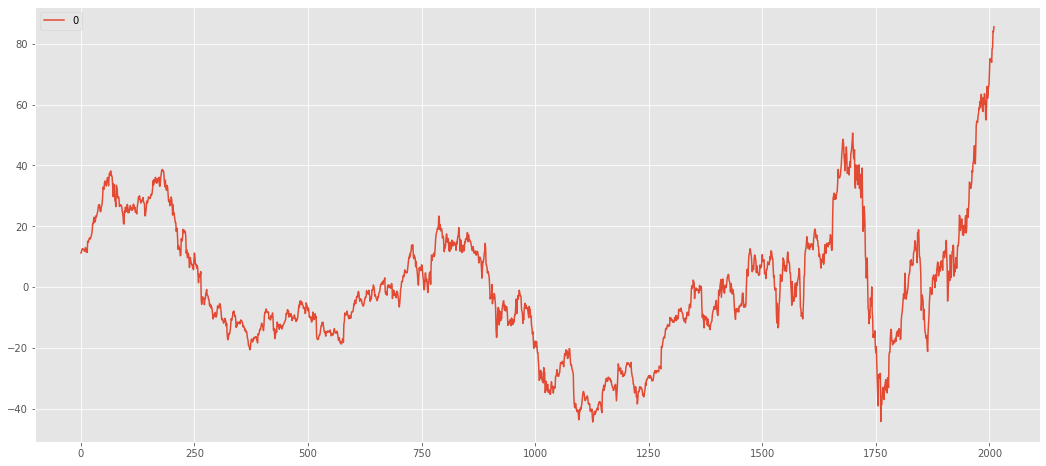

In [ ]:
from scipy import signal
detrended=signal.detrend(df.Close)
detrended_df=pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [ ]:
adfuller_test(detrended_df)

ADF Test Statistics: -0.7538890107192627
p-value: 0.8322931564205
# Lags Used: 9
Number of Observations Used: 2001
Accept Null Hypothesis. Data is non-stationary


In [ ]:
#Differencing

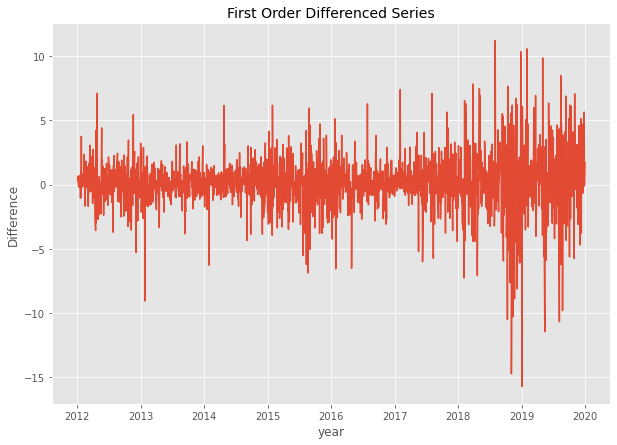

In [ ]:
df['Diff']=df['Close'].diff()
#plot the change
plt.figure(figsize=(10,7))
plt.plot(df['Diff'])
plt.title('First Order Differenced Series',fontsize=14)
plt.xlabel('year',fontsize=12)
plt.ylabel('Difference',fontsize=12)
plt.show()

In [ ]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistics: -13.625538376073807
p-value: 1.7630934279440248e-25
# Lags Used: 8
Number of Observations Used: 2001
Reject Null Hypothesis. Data is stationary


ACF plots and PACF plots

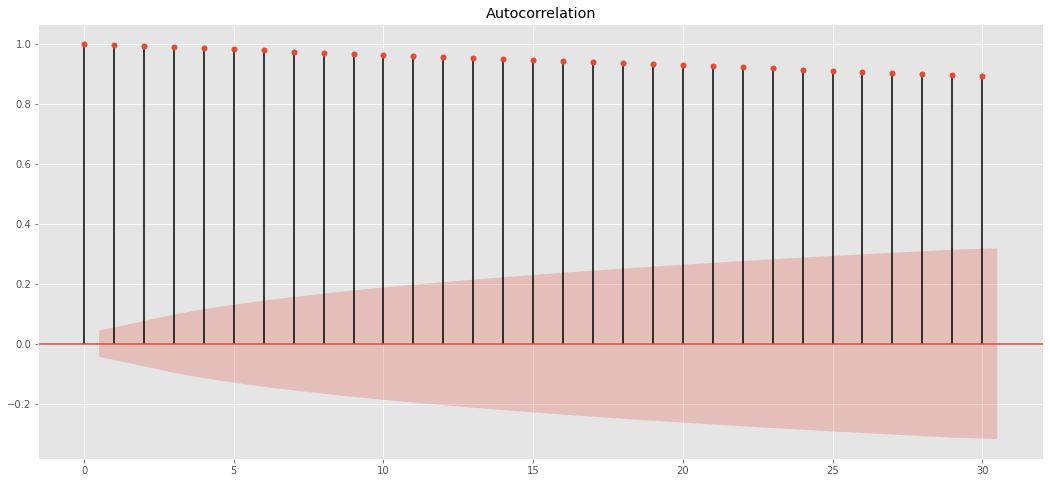

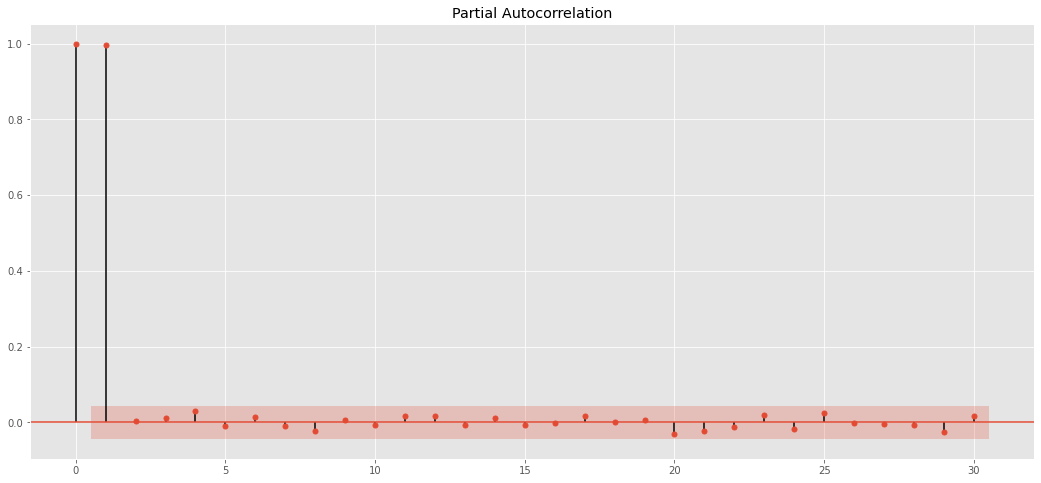

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Close'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

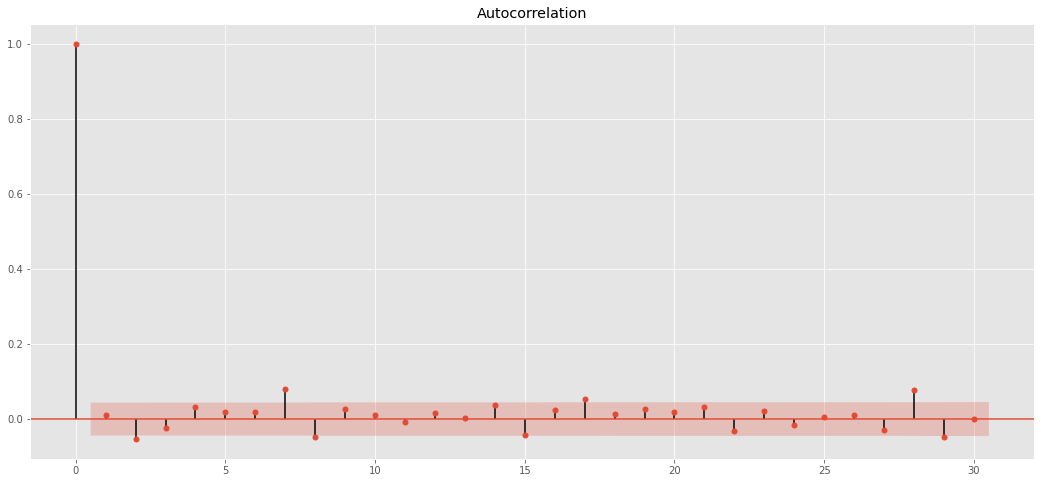

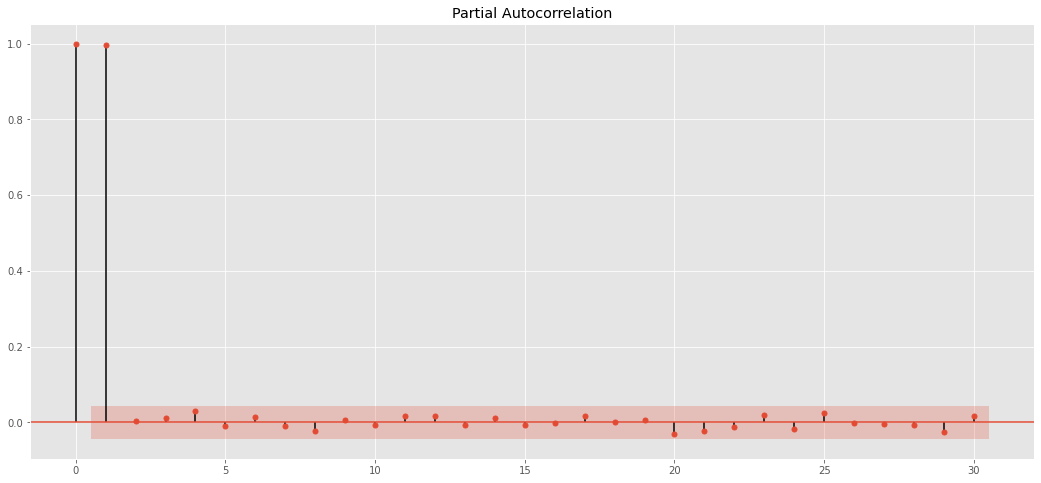

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close,test="adf")

1

# ARIMA MODEL

In [ ]:
df.drop(["Open",'High','Low','Adj Close','Volume','year','month','day','quarter'],axis=1,inplace=True)


In [ ]:
df1=df.drop("Close",axis=1)
df1.head()

,Diff
Date,
2012-01-03,NaN
2012-01-04,0.31
2012-01-05,0.66
2012-01-06,0.62
2012-01-09,-0.09


In [ ]:
df=df.drop("Diff",axis=1)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [ ]:
split_date="2018-01-01"
train=df.loc[df.index < split_date]
test=df.loc[df.index >= split_date]
print("Train data:",train.shape)
print("Test data:",test.shape)

Train data: (1509, 1)
Test data: (502, 1)


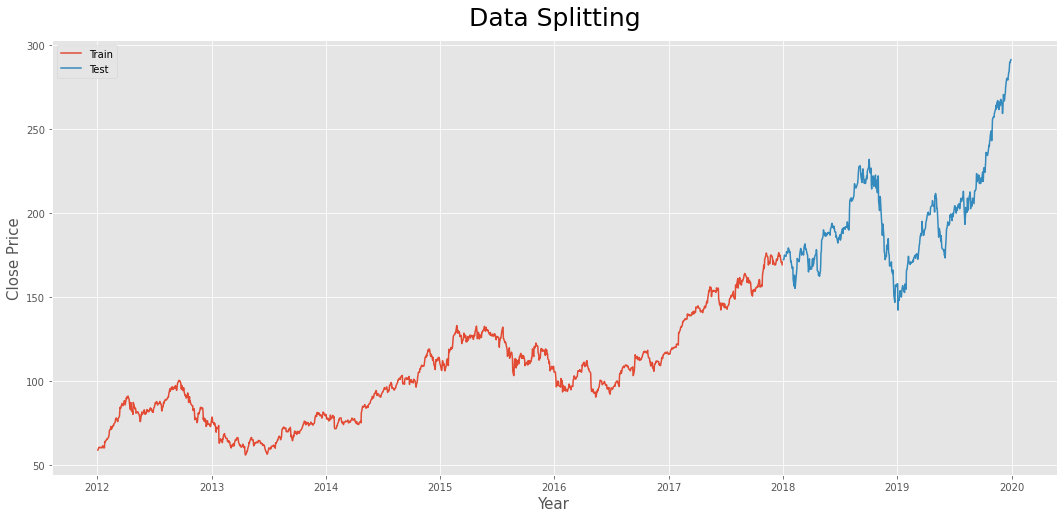

In [ ]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.title("Data Splitting",size=25,y=1.02)
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stepwise_fit=auto_arima(train,trace=True,suppress_warnings=True,seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5590.222, Time=4.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=1.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=2.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=5.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=9.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=2.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=2.42 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.541, Time=11.59 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.992, Time=4.54 sec

Best model:  ARIMA(2,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2789.111
Date:                Wed, 08 Feb 2023   AIC                           5590.222
Time:                        05:33:02   BIC                           5622.134
Sample:                             0   HQIC                          5602.107
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1061      0.057      1.870      0.061      -0.005       0.217
ar.L1          0.5648      0.015     37.195      0.000       0.535       0.595
ar.L2         -0.9827      0.015    -67.102      0.000      -1.011      -0.954
ma.L1         -0.5757      0.018    -32.125      0.000      -0.611      -0.541
ma.L2          0.9787      0.017     56.566      0.000       0.945       1.013
sigma2         2.3723      0.053     45.093      0.000       2.269       2.475
===================================================================================
Ljung-Box (L1) (Q):                   1.64   Jarque-Bera (JB):               846.07
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_arima=ARIMA(train['Close'],order=(1,1,1))
result=model_arima.fit()
result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2794.704
Date:                Wed, 08 Feb 2023   AIC                           5595.408
Time:                        05:33:03   BIC                           5611.363
Sample:                             0   HQIC                          5601.350
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.655     -0.487      0.626      -1.604       0.965
ma.L1          0.3500      0.650      0.539      0.590      -0.924       1.624
sigma2         2.3836      0.052     46.165      0.000       2.282       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               866.63
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred=pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index=test.index
test_pred

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,predicted_mean
Date,
2018-01-02,169.174040
2018-01-03,169.191910
2018-01-04,169.186203
2018-01-05,169.188026
2018-01-08,169.187444
...,...
2019-12-23,169.187585
2019-12-24,169.187585
2019-12-26,169.187585


In [ ]:
start=len(train)
end=len(train)+len(test)-1
test_pred=pd.DataFrame(result.predict(start=start,end=end,type='levels'))
test_pred_index=test.index
test_pred
test_pred.index=df.index[start:end+1]
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.174040
2018-01-03      169.191910
2018-01-04      169.186203
2018-01-05      169.188026
2018-01-08      169.187444
...                    ...
2019-12-23      169.187585
2019-12-24      169.187585
2019-12-26      169.187585
2019-12-27      169.187585
2019-12-30      169.187585

[502 rows x 1 columns]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


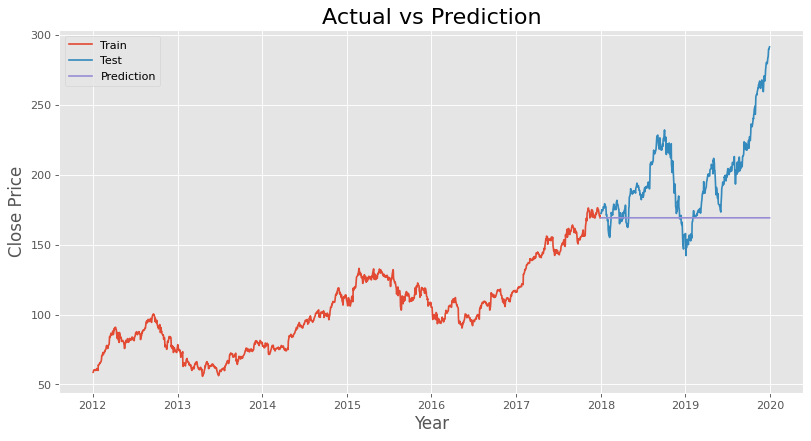

In [ ]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(test_pred,label='Prediction')
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.title("Actual vs Prediction",size=20)
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [ ]:
mse=mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'mean_squared_error(MSE)=',mse)
rmse=np.round(np.sqrt(mse),2)
print(f' Root mean_squared_error(RMSE)=',rmse)
mae=mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'mean_absolute_error(MAE)=',mae)
mape=mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'mean_absolute_percentage_error(MAPE)=',mape)




mean_squared_error(MSE)= 1740.3560229489854
 Root mean_squared_error(RMSE)= 41.72
mean_absolute_error(MAE)= 31.587587254693787
mean_absolute_percentage_error(MAPE)= 0.1867015697928796


RMSE:it measures the average magnitude of error and is concerned with the deviation from the actual value.
RASE value with zero indicates that the model has a perfect fit.The lower the RMSE,the better the model and its prediction

In [ ]:
import itertools
p=range(0,3)
d=range(1,2)
q=range(0,3)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],22)for x in list(itertools.product(p,d,q))]
print('Example of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
     for param_seasonal in seasonal_pdq:
            try:
                mod= sm.tsa.statespace.SARIMAX(y,
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
                results=mod.fit()
                print('ARIMA{}x12-AIC:{}'.format(param,param_seasonal,result.aic))
            except:
                    continue

Example of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [ ]:
model_SA =sm.tsa.SARIMAX(train['Close'],order=(0,1,2),seasonal_order=(1,1,0,66))
result_SA =model_SA.fit()
result_SA.summary()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -3016.116
Date:                             Wed, 08 Feb 2023   AIC                           6040.232
Time:                                     05:34:07   BIC                           6061.327
Sample:                                          0   HQIC                          6048.106
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0037      0.023      0.160      0.873      -0.042       0.049
ma.L2         -0.0329      0.025     -1.307      0.191      -0.082       0.016
ar.S.L66      -0.4966      0.018    -28.337      0.000      -0.531      -0.462
sigma2         3.7901      0.090     42.147      0.000       3.614       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               548.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_pred_SA=pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index=test.index
test_pred_SA

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,predicted_mean
Date,
2018-01-02,170.072161
2018-01-03,169.463860
2018-01-04,168.848892
2018-01-05,169.735641
2018-01-08,169.005296
...,...
2019-12-23,276.735600
2019-12-24,278.666343
2019-12-26,277.815518


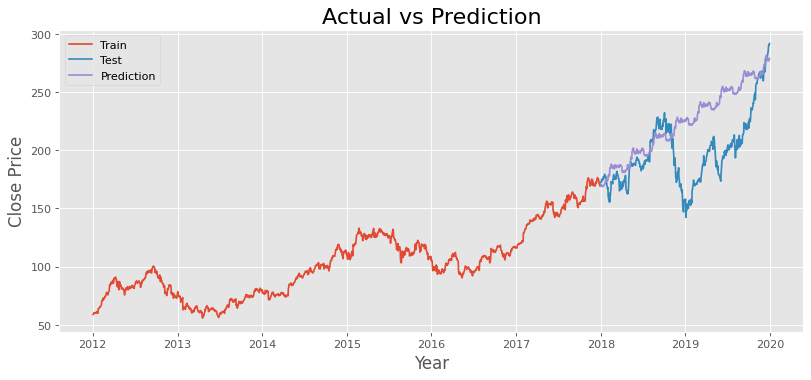

In [ ]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(test_pred_SA,label='Prediction')
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.title("Actual vs Prediction",size=20)
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [ ]:
mse=mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'mean_squared_error(MSE)=',mse)
rmse=np.round(np.sqrt(mse),2)
print(f' Root mean_squared_error(RMSE)=',rmse)
mae=mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'mean_absolute_error(MAE)=',mae)
mape=mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'mean_absolute_percentage_error(MAPE)=',mape)



mean_squared_error(MSE)= 1326.4439574225132
 Root mean_squared_error(RMSE)= 36.42
mean_absolute_error(MAE)= 28.508333803434194
mean_absolute_percentage_error(MAPE)= 0.1227098416899658


# Forecasting next 30 days

In [ ]:
forecast_SA=result_SA.predict(len(df),len(df)+31,type='levels')
forecast_SA
index_future_dates=pd.date_range(start='2019-12-30',end='2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2019-12-30    279.799047
2019-12-31    280.655336
2020-01-01    280.132363
2020-01-02    279.214844
2020-01-03    277.006674
2020-01-04    279.125432
2020-01-05    279.065934
2020-01-06    278.374616
2020-01-07    278.482387
2020-01-08    278.077183
2020-01-09    277.633457
2020-01-10    277.610729
2020-01-11    279.604933
2020-01-12    278.086168
2020-01-13    279.416505
2020-01-14    279.171462
2020-01-15    279.942941
2020-01-16    281.130121
2020-01-17    280.400544
2020-01-18    279.873351
2020-01-19    280.335002
2020-01-20    279.455656
2020-01-21    275.597479
2020-01-22    275.121689
2020-01-23    275.000031
2020-01-24    274.617812
2020-01-25    275.541904
2020-01-26    274.820644
2020-01-27    274.686661
2020-01-28    275.177787
2020-01-29    274.910370
2020-01-30    274.355810
Freq: D, Name: predicted_mean, dtype: float64


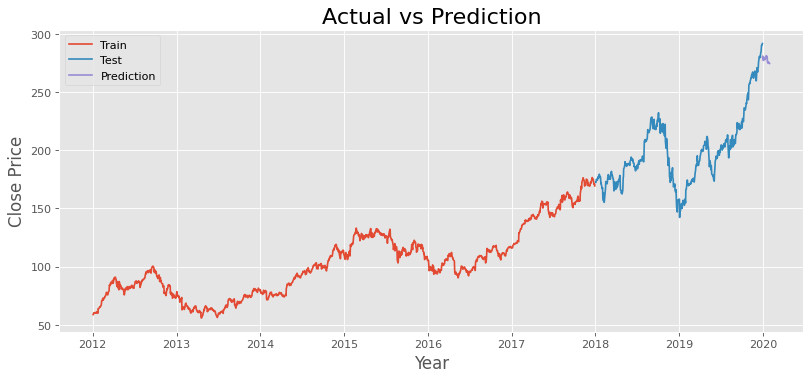

In [ ]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_SA,label='Prediction')
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.title("Actual vs Prediction",size=20)
plt.legend(loc='upper left',fontsize=10)
plt.show()

# Holt Method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
m=22
alpha=1/(2*m)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


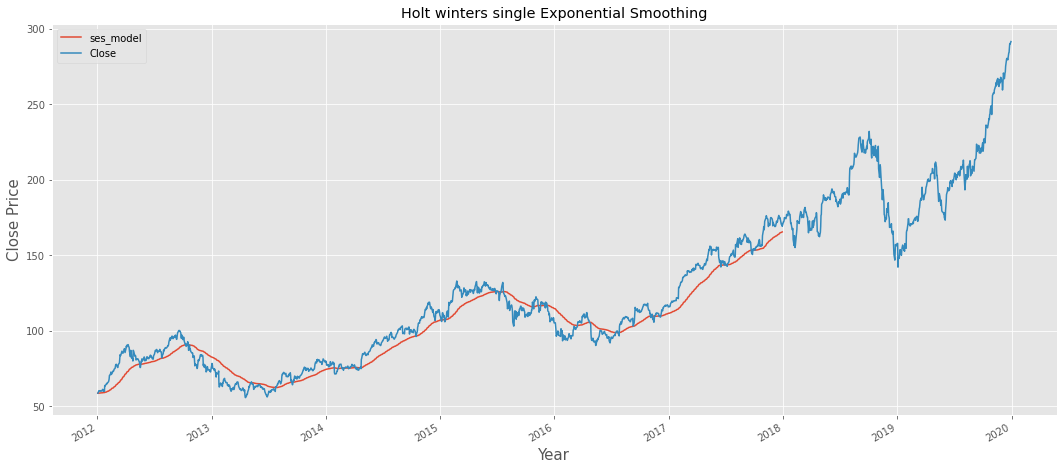

In [ ]:
df['ses_model']=SimpleExpSmoothing(train['Close']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['ses_model','Close']].plot(title='Holt winters single Exponential Smoothing',legend=True)
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


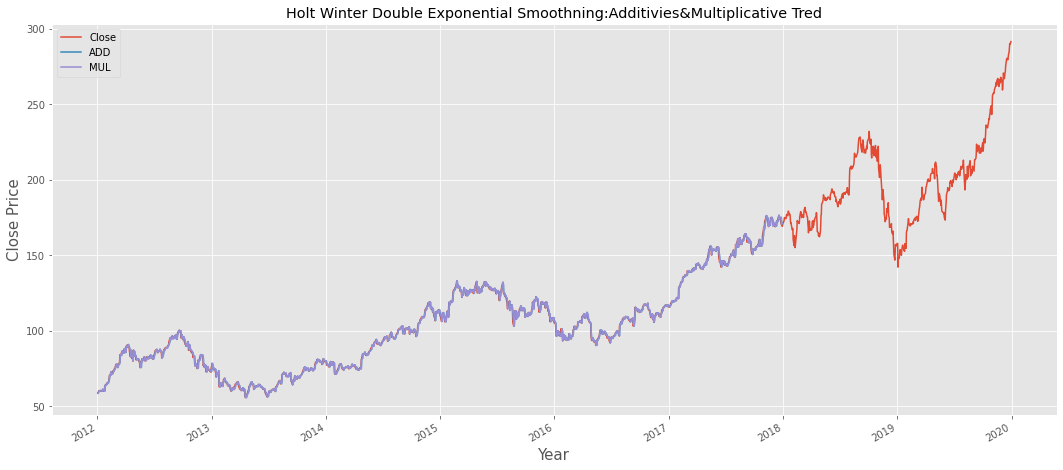

In [ ]:
df['ADD']=ExponentialSmoothing(train['Close'],trend='add').fit().fittedvalues
df['MUL']=ExponentialSmoothing(train['Close'],trend='MUL').fit().fittedvalues
df[['Close','ADD','MUL']].plot(title='Holt Winter Double Exponential Smoothning:Additivies&Multiplicative Tred')
plt.xlabel("Year",size=15);plt.ylabel('Close Price',size=15)
plt.show()


# Forecasting with Holt-Winters Exponential Smoothing (Triple ES)

In [ ]:
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]  #to print output in date format 
print(test_predictions)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Date
2018-01-02    168.860570
2018-01-03    169.518860
2018-01-04    170.167156
2018-01-05    170.386996
2018-01-08    170.646741
                 ...    
2019-12-23    245.640236
2019-12-24    246.716323
2019-12-26    246.349048
2019-12-27    246.072348
2019-12-30    246.201353
Length: 502, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


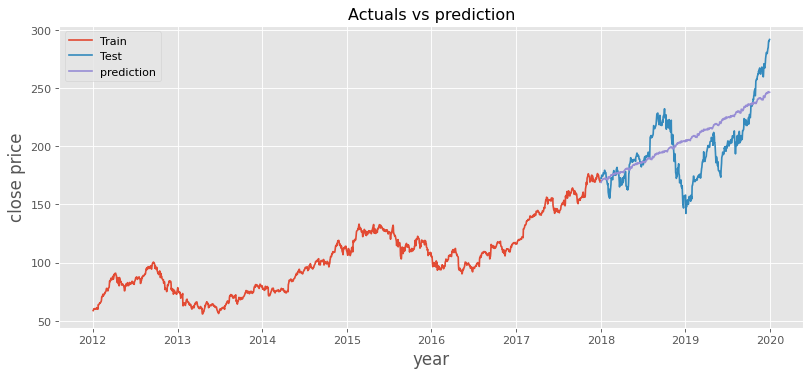

In [ ]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(test_predictions,label='prediction')
plt.title('Actuals vs prediction');plt.xlabel("year",size=15);plt.ylabel('close price',size = 15)
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE)=',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE)=',rmse)
mae= mean_absolute_error(test,test_predictions)
print(f'Mean Absolute  Error (MAE)=',mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute percentage Error(MAPE)=',mape)

Mean Squared Error(MSE)= 578.8207509057631
Root Mean Squared Error(RMSE)= 24.06
Mean Absolute  Error (MAE)= 19.643499240031275
Mean Absolute percentage Error(MAPE)= 0.1022749625623781


In [ ]:
#fit the model tend ='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]  # to print output in data format
print(test_predictions)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Date
2018-01-02    168.851566
2018-01-03    169.671805
2018-01-04    170.480506
2018-01-05    170.617724
2018-01-08    170.944091
                 ...    
2019-12-23    227.222055
2019-12-24    228.056716
2019-12-26    227.684585
2019-12-27    227.526933
2019-12-30    227.629252
Length: 502, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


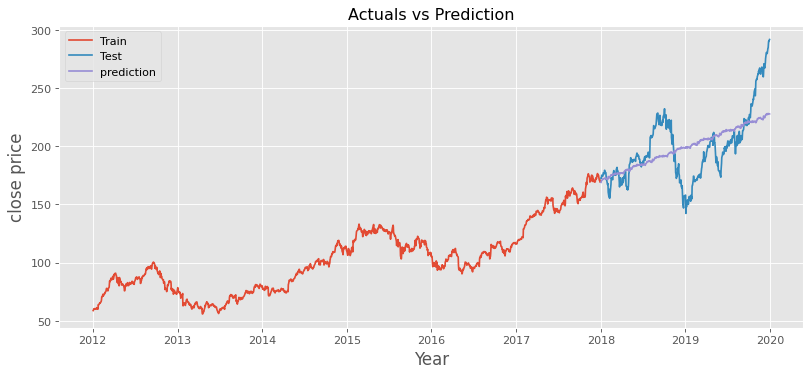

In [ ]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(test_predictions,label='prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year",size=15);plt.ylabel('close price',size = 15)
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE)=',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE)=',rmse)
mae= mean_absolute_error(test,test_predictions)
print(f'Mean Absolute  Error (MAE)=',mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute percentage Error(MAPE)=',mape)

Mean Squared Error(MSE)= 543.6044964305978
Root Mean Squared Error(RMSE)= 23.32
Mean Absolute  Error (MAE)= 18.063439556445093
Mean Absolute percentage Error(MAPE)= 0.0911793715867424


In [ ]:
#fit the model tend ='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]  # to print output in data format
print(test_predictions)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Date
2018-01-02    168.851566
2018-01-03    169.671805
2018-01-04    170.480506
2018-01-05    170.617724
2018-01-08    170.944091
                 ...    
2019-12-23    227.222055
2019-12-24    228.056716
2019-12-26    227.684585
2019-12-27    227.526933
2019-12-30    227.629252
Length: 502, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


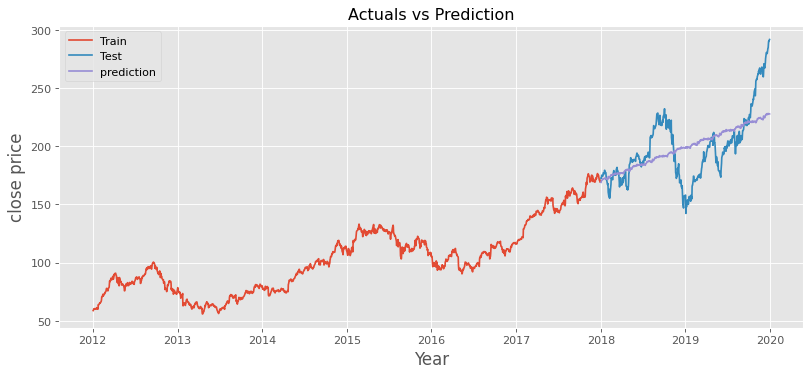

In [ ]:
plt.figure(figsize=(12,5),dpi=80)
plt.plot(train,label = 'Train')
plt.plot(test,label = 'Test')
plt.plot(test_predictions,label='prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year",size=15);plt.ylabel('close price',size = 15)
plt.legend(loc='upper left',fontsize=10)
plt.show()

In [ ]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error(MSE)=',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error(RMSE)=',rmse)
mae= mean_absolute_error(test,test_predictions)
print(f'Mean Absolute  Error (MAE)=',mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute percentage Error(MAPE)=',mape)

Mean Squared Error(MSE)= 543.6044964305978
Root Mean Squared Error(RMSE)= 23.32
Mean Absolute  Error (MAE)= 18.063439556445093
Mean Absolute percentage Error(MAPE)= 0.0911793715867424


we have selected the SARIMA model because our data is seasonal.
SARIMA has more input parameters than Holt-Winters method and has a better prediction.SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.